In [9]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

(1333, 1000, 3)


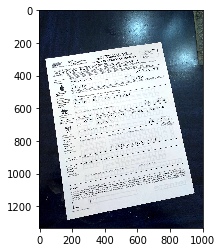

In [10]:
image=cv2.imread("scanned-form.jpg")
print(image.shape)
original = image.copy()
plt.imshow(image)

In [11]:
mask = np.zeros(image.shape[:2], np.uint8) 
backgroundModel = np.zeros((1, 65), np.float64) 
foregroundModel = np.zeros((1, 65), np.float64) 
rectangle = (0, 175, 1000, 1333-175) 

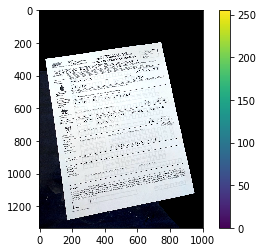

In [12]:
cv2.grabCut(image, mask, rectangle,   
            backgroundModel, foregroundModel, 
            3, cv2.GC_INIT_WITH_RECT) 
mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8') 
   
# The final mask is multiplied with  
# the input image to give the segmented image. 
image = image * mask2[:, :, np.newaxis] 
   
# output segmented image with colorbar 
plt.imshow(image) 
plt.colorbar() 
plt.show() 

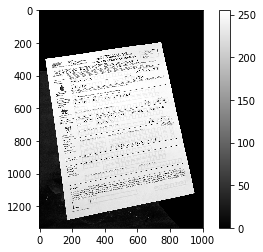

In [13]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")
plt.colorbar() 
plt.show() 

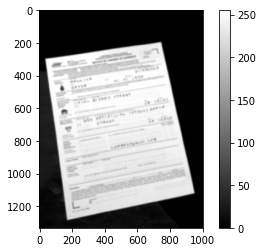

In [14]:
blur = cv2.GaussianBlur(gray, (25,25), 0)
plt.imshow(blur, cmap="gray")
plt.colorbar() 
plt.show() 

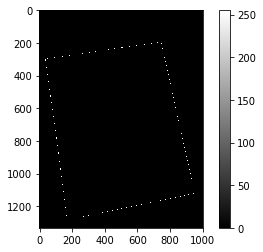

[[[  42  301]]

 [[ 741  199]]

 [[ 944 1118]]

 [[ 175 1280]]]


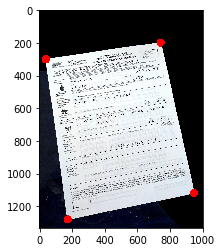

[[42, 301], [741, 199], [944, 1118], [175, 1280]]


In [15]:
edges = cv2.Canny(blur, 45, 215)
plt.imshow(edges, cmap="gray")
plt.colorbar() 
plt.show() 

corners = cv2.goodFeaturesToTrack(blur, 4, 0.02, 500)
corners = np.int0(corners)
print(corners)
pts = []
for i in corners:
    x,y = i.ravel()
    pts.append([x,y])
    cv2.circle(image, (x,y),25,255,-1)
plt.imshow(image)
plt.show()
print(pts)

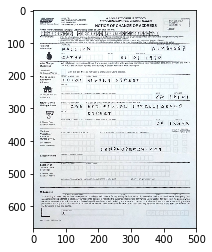

In [16]:
src = np.array([pts[0], pts[1], pts[3], pts[2]], dtype=float)

dst = np.array([[0,0], [500, 0], [0,667],[500,667]], dtype=float)

h, status = cv2.findHomography(src, dst)

final = cv2.warpPerspective(original, h, (500, 667))
plt.imshow(final)